<a href="https://colab.research.google.com/github/neuralsrg/LinearAlgebra/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Singular value decomposition (SVD)

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Singular Value Decomposition

$$
X = 
\begin{bmatrix}
\vert & \vert & \cdots & \vert\\
x_1 & x_2 & \cdots & x_m\\
\vert & \vert & \cdots & \vert\\
\end{bmatrix}
= U Σ V^T
= 
\begin{bmatrix}
\vert & \vert & \cdots & \vert\\
u_1 & u_2 & \cdots & u_n\\
\vert & \vert & \cdots & \vert\\
\end{bmatrix}
\begin{bmatrix}
\sigma_1 &  &  & \\
 & \sigma_2 &  & \\
 &  & \ddots & \\
 &  &  & \sigma_m \\
 0 & 0 & \cdots & 0 \\
 \vdots & \vdots & \cdots & \vdots\\
\end{bmatrix}
\begin{bmatrix}
\vert & \vert & \cdots & \vert\\
v_1 & v_2 & \cdots & v_m\\
\vert & \vert & \cdots & \vert\\
\end{bmatrix}^T
$$

### Calculating example

In [ ]:
X = np.array([[-5, 2, 3],
              [2, 5, 1],
              [-3, 1, -5]])

# compute squares of X singular values and eigen vectors v:
ev, v = np.linalg.eigh(X.T @ X)

# but the eigen values go in wrong order here...
ev

array([25., 39., 39.])

In [ ]:
# test 
v1 = v[:, 0]

(X.T @ X) @ v1

array([  6.68153105,  20.04459314, -13.3630621 ])

In [ ]:
ev[0] * v1

array([  6.68153105,  20.04459314, -13.3630621 ])

In [ ]:
# find matrix U

u0 = X @ v[:, 0] / np.linalg.norm(X @ v[:, 0])
u1 = X @ v[:, 1] / np.linalg.norm(X @ v[:, 1])
u2 = X @ v[:, 2] / np.linalg.norm(X @ v[:, 2])

U = np.array([u0, u1, u2]).T
U

array([[-0.26726124,  0.77151675,  0.57735027],
       [ 0.80178373, -0.15430335,  0.57735027],
       [ 0.53452248,  0.6172134 , -0.57735027]])

$$
X = U Σ V^T
$$
$$
U^TXV = Σ 
$$

In [ ]:
np.round(U.T @ X @ v, decimals=5) # which gives us singular values matrix Sigma

array([[ 5.   ,  0.   , -0.   ],
       [-0.   ,  6.245, -0.   ],
       [-0.   , -0.   ,  6.245]])

In [ ]:
Sigma = np.diag(np.sqrt(ev))
Sigma

array([[5.      , 0.      , 0.      ],
       [0.      , 6.244998, 0.      ],
       [0.      , 0.      , 6.244998]])

In [ ]:
# restore X

X_restored = U @ Sigma @ v.T
X_restored

array([[-5.,  2.,  3.],
       [ 2.,  5.,  1.],
       [-3.,  1., -5.]])

keeping matrices in the right order ($\sigma_1$ >= $\sigma_2$ >= ...)

In [ ]:
U_corrected = np.flip(U, axis=1)
Sigma_corrected = np.flip(Sigma, axis=(0, 1))
v_corrected = np.flip(v, axis=1)

U_corrected @ Sigma_corrected @ v_corrected.T

array([[-5.,  2.,  3.],
       [ 2.,  5.,  1.],
       [-3.,  1., -5.]])

In [ ]:
U_corrected

array([[ 0.57735027,  0.77151675, -0.26726124],
       [ 0.57735027, -0.15430335,  0.80178373],
       [-0.57735027,  0.6172134 ,  0.53452248]])

In [ ]:
u2

array([ 0.57735027,  0.57735027, -0.57735027])

## SVD on images

In [ ]:
image_dataset = h5py.File('/content/drive/MyDrive/Faces.h5', "r")
imgs = np.array(image_dataset['dataset'])
image_dataset.close()
imgs.shape

(11, 500, 750, 3)

In [ ]:
# taking mean in order to deal with grayscale images (with 1 channel)

imgs = np.mean(imgs, axis=-1) / 255.
imgs.shape

(11, 500, 750)

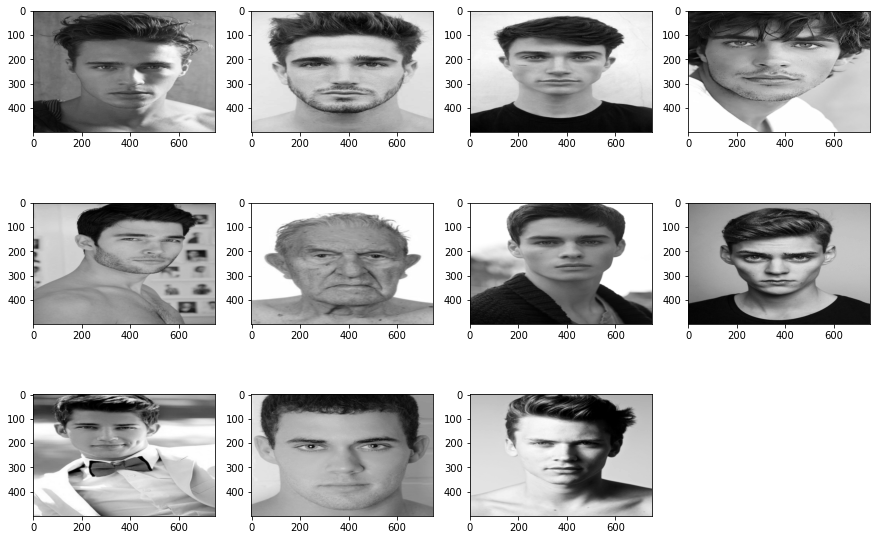

In [ ]:
plt.figure(figsize=(15, 10))

for ind, img in enumerate(imgs):
  plt.subplot(3, 4, ind+1)
  plt.imshow(img, cmap='gray')

$$
X = 
\begin{bmatrix}
\vert & \vert & \cdots & \vert\\
x_1 & x_2 & \cdots & x_m\\
\vert & \vert & \cdots & \vert\\
\end{bmatrix}
= U Σ V^T
= 
\begin{bmatrix}
\vert & \vert & \cdots & \vert\\
u_1 & u_2 & \cdots & u_n\\
\vert & \vert & \cdots & \vert\\
\end{bmatrix}
\begin{bmatrix}
\sigma_1 &  &  & \\
 & \sigma_2 &  & \\
 &  & \ddots & \\
 &  &  & \sigma_m \\
 0 & 0 & \cdots & 0 \\
 \vdots & \vdots & \cdots & \vdots\\
\end{bmatrix}
\begin{bmatrix}
\vert & \vert & \cdots & \vert\\
v_1 & v_2 & \cdots & v_m\\
\vert & \vert & \cdots & \vert\\
\end{bmatrix}^T
$$

$ (n, m) = (n, n) * (n, m) * (m, m) $

$ U $ denotes "eigen faces" in hierarchical order; $ u_1 $ is the most important

$ Σ $ contains "scaling parameters"

$ V: $ columns of $V$ (rows of $V^T$) represent some eigen time series. Columns of $V^T$ are "eigen mixture", they repesent the ratio which we should follow to sum up $U$ column vectors to restore the image.


$ U $ and $ V $ are unitary: $ UU^T = U^TU = I $

In [ ]:
# reshaping imgs matrix to get X

X = imgs.reshape(11, -1).T
X.shape

(375000, 11)

In [ ]:
eigen_values, V = np.linalg.eigh(X.T @ X)

eigen_values = np.sqrt(eigen_values[::-1])
V = np.flip(V, axis=1)

eigen_values

array([1200.0052 ,  282.72232,  199.7    ,  141.77824,  131.6573 ,
        121.12648,  115.07343,  112.40815,   94.60186,   87.03162,
         84.01261], dtype=float32)

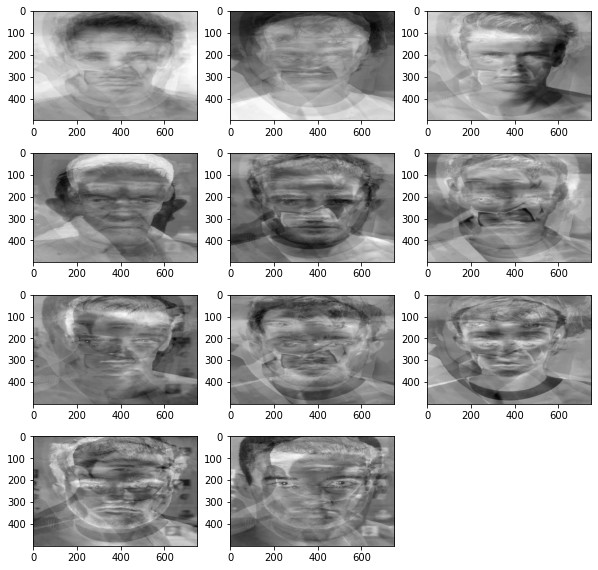

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(V.shape[0]):
  u = X @ V[:, i] / np.linalg.norm(X @ V[:, i])
  plt.subplot(4, 3, i+1).imshow(u.reshape(500, 750), cmap='gray')

In [ ]:
U11 = np.empty((375000, 0))

for i in range(11):
  u = X @ V[:, i] / np.linalg.norm(X @ V[:, i])
  U11 = np.append(U11, np.expand_dims(u, -1), axis=-1)

U11.shape

(375000, 11)

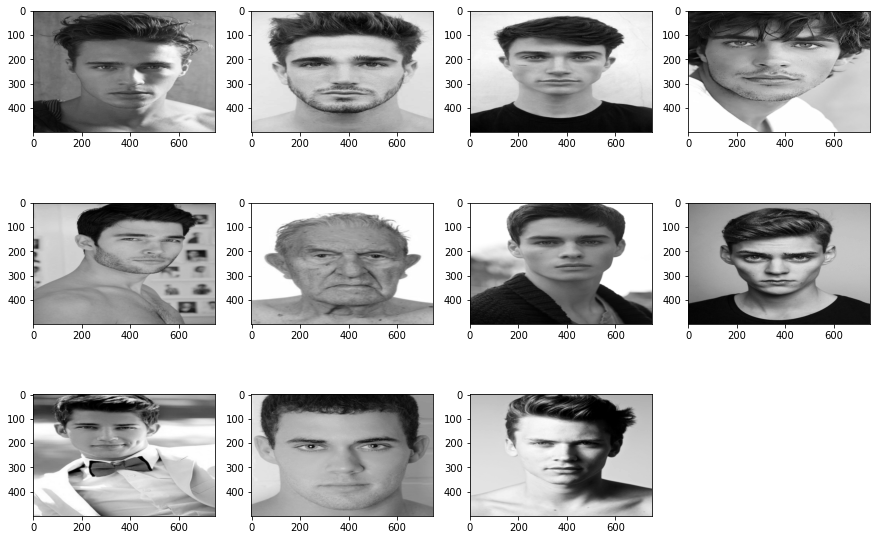

In [ ]:
X_restored = U11 @ np.diag(eigen_values) @ V.T

plt.figure(figsize=(15, 10))

for ind, img in enumerate(imgs):

  img = X_restored[:, ind].reshape(500, 750)
  
  plt.subplot(3, 4, ind+1)
  plt.imshow(img, cmap='gray')

#### Note:

X is (375000, 11) => there only 11 linearly independent vectors. So we don't need to compute entire (n, n) U matrix. (n, m) is enough. This is calles `economy SVD`

BUT: 

$ Û^TÛ = I $

$ ÛÛ^T \not = I $

## Matrix approximation 

We can do the $ U \Sigma V $ multiplications as follows:
$ U \Sigma V = σ_1u_1v_1^T + σ_2u_2v_2^T + ... + σ_11u_11v_11^T$

This looks like:
$$
\sigma_1
\begin{bmatrix}
\vdots\\
u_1\\
\vdots\\
\end{bmatrix}
\begin{bmatrix}
\cdots & v_1^T & \cdots
\end{bmatrix} + 
$$
$$
+ \sigma_2
\begin{bmatrix}
\vdots\\
u_2\\
\vdots\\
\end{bmatrix}
\begin{bmatrix}
\cdots & v_2^T & \cdots
\end{bmatrix} + ... 
$$
And since $ \sigma_1 >= \sigma_1 >= ... >= \sigma_11 $ to approximate matrix X we can ommit some of the last terms

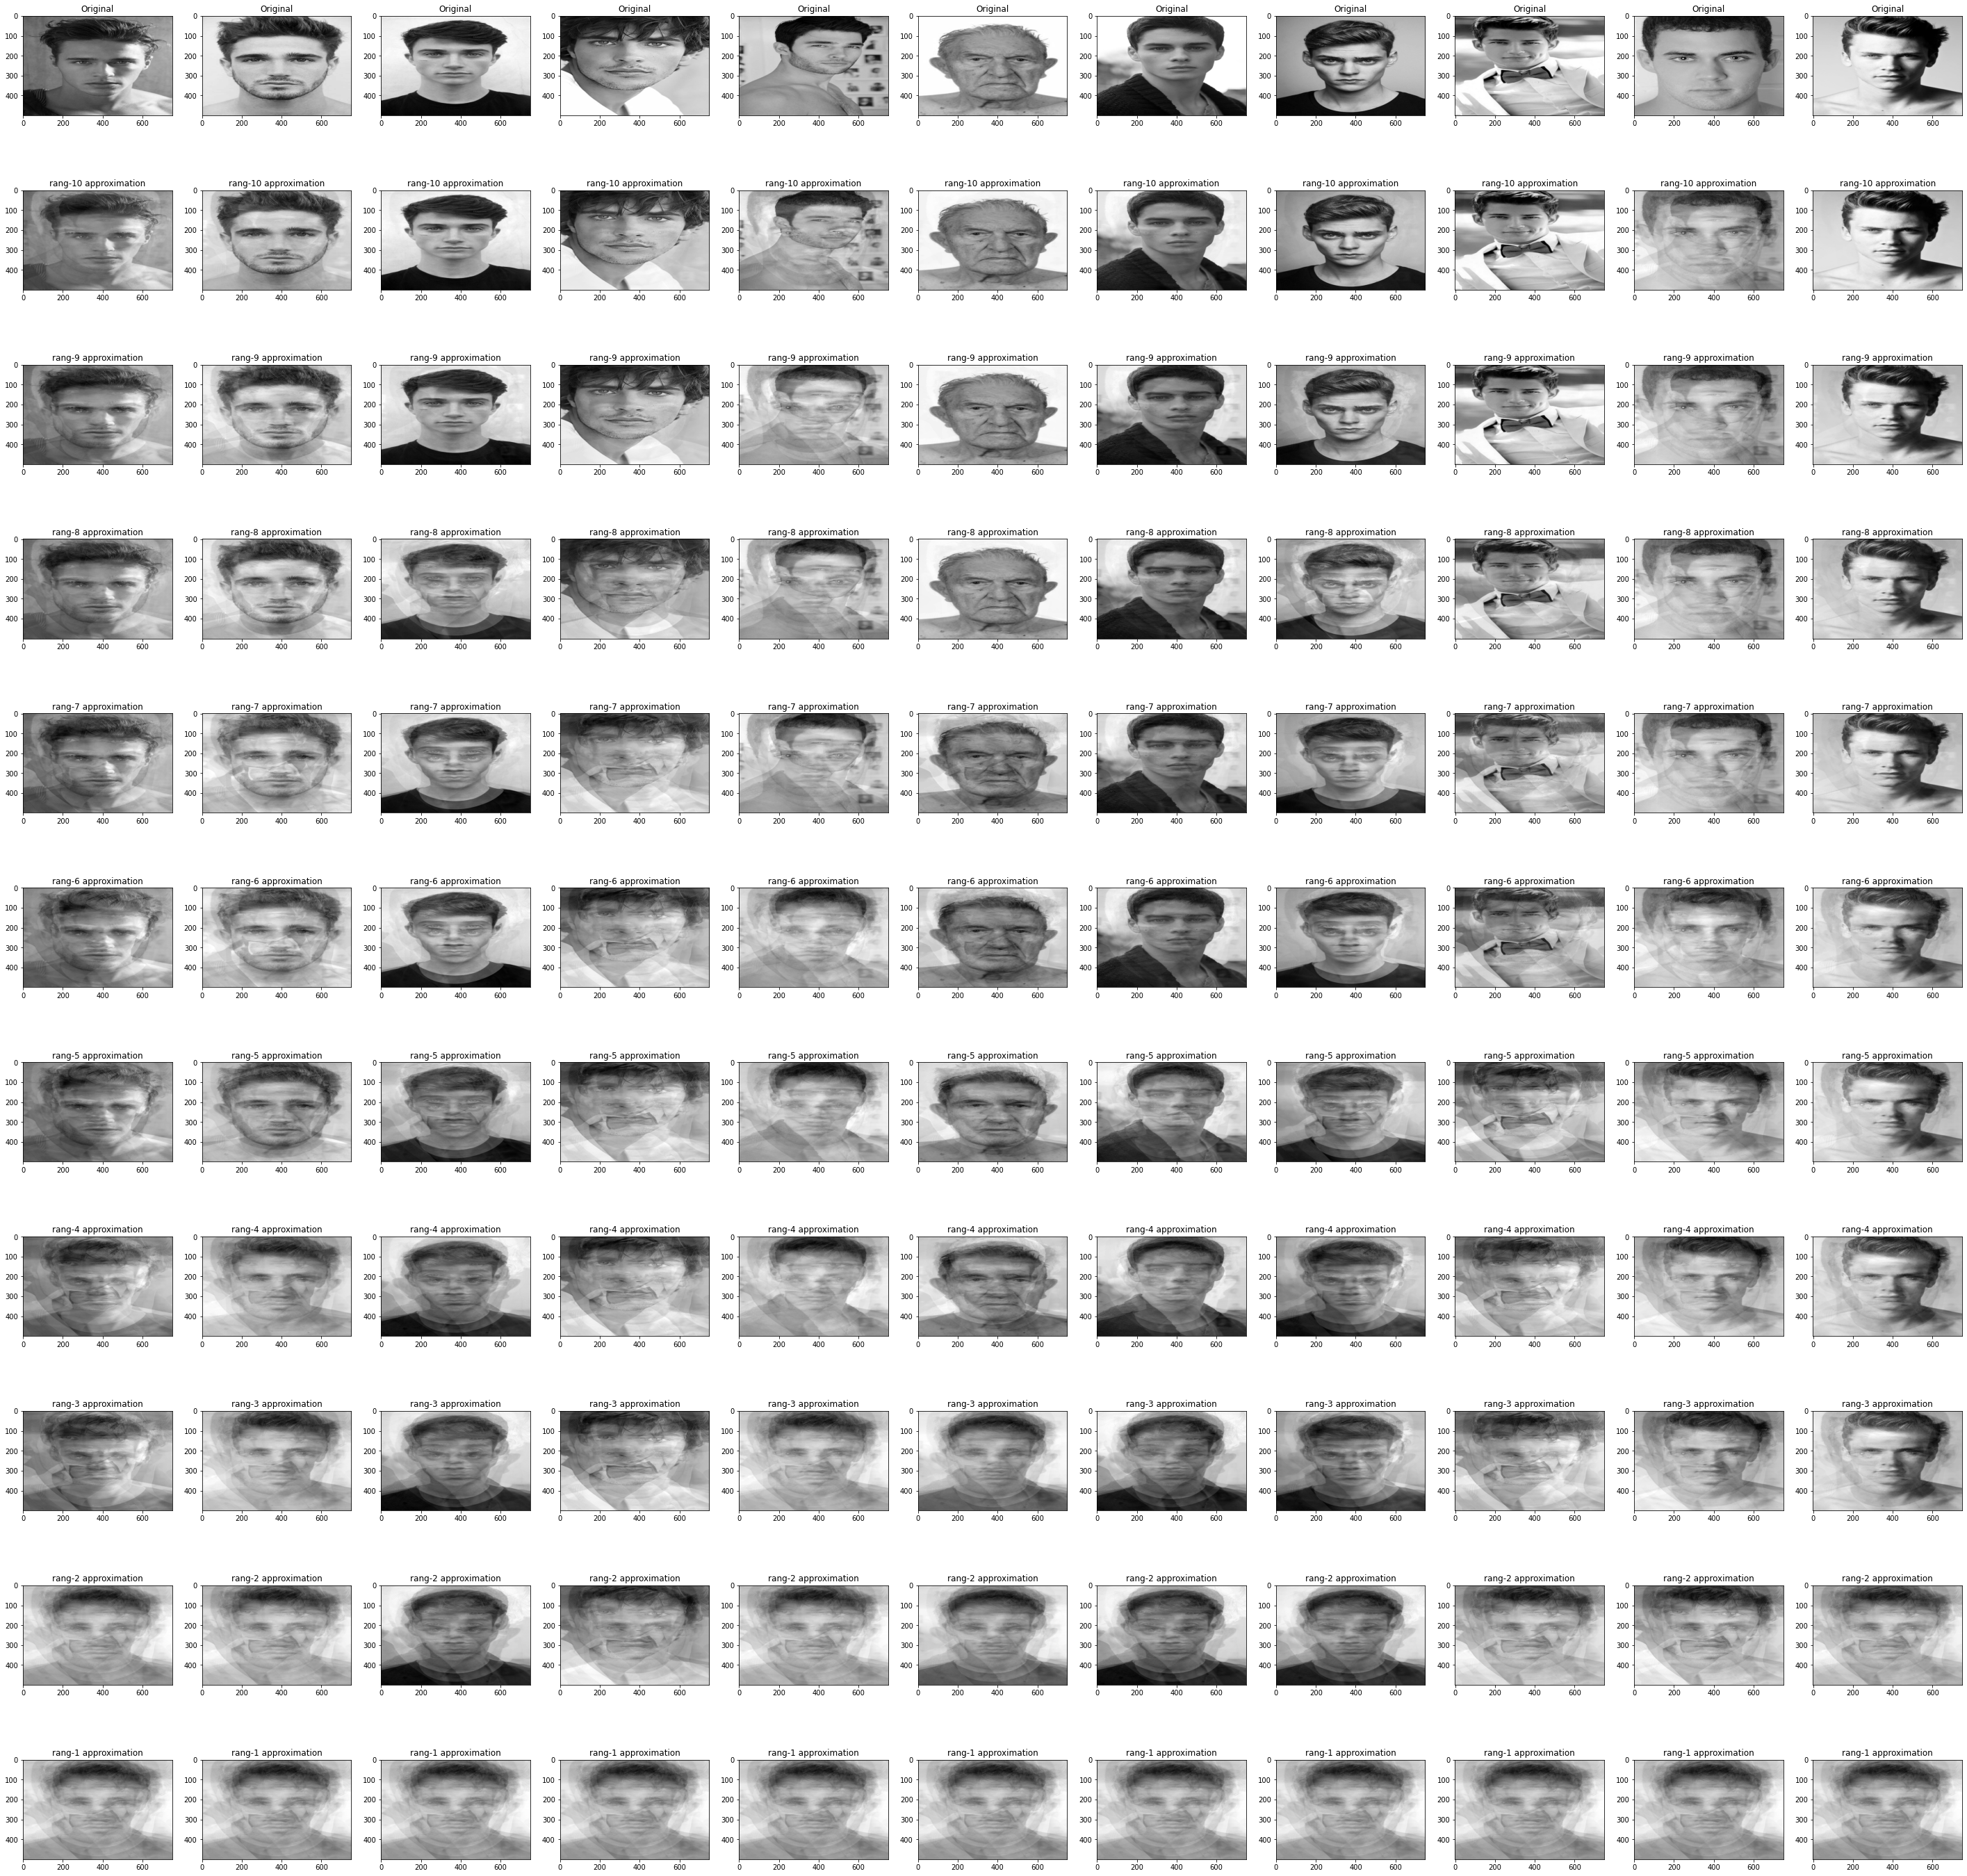

In [ ]:
eig_vals = eigen_values.copy()
# plt.figure(figsize=(30, 20))
fit, axes = plt.subplots(11, 11, figsize=(50, 50))

for i in range(11):
  img = X_restored[:, i].reshape(500, 750)
  axes[0, i].imshow(img, cmap='gray')
  axes[0, i].set_title('Original')

for rang in range(10):
  eig_vals[-(rang + 1)] = 0
  approximation = U11 @ np.diag(eig_vals) @ V.T

  for i in range(11):
    img = approximation[:, i].reshape(500, 750)
    axes[rang + 1, i].imshow(img, cmap='gray')
    axes[rang + 1, i].set_title(f'rang-{10 - rang} approximation')

### Correlation matrices

$ X^TX = V \Sigma U^T UΣV^T = V \Sigma^2 V^T => X^TXV = V\Sigma^2 $

$V$ - eigen vectors of $X^TX$

$ XX^T = U \Sigma V^T VΣU^T = U \Sigma^2 U^T => X^TXU = U\Sigma^2 $

$U$ - eigen vectors of $XX^T$, where

$ X^TX $ - column-wise correlation matrix

$ XX^T $ - row-wise correlation matrix

## Single image compression

(-0.5, 1599.5, 1199.5, -0.5)

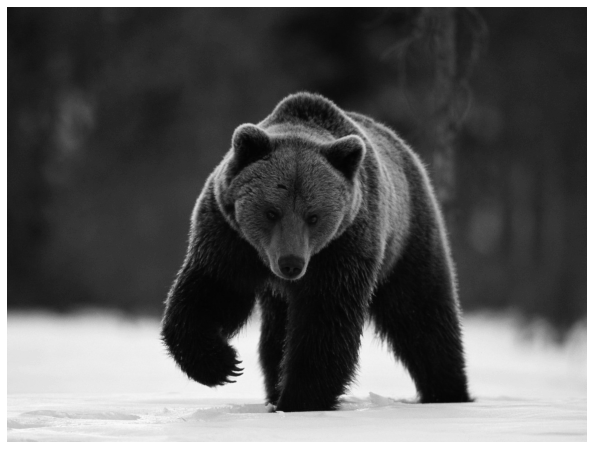

In [ ]:
from matplotlib.image import imread
plt.rcParams['figure.figsize'] = [16, 8]

X = imread('/content/drive/MyDrive/bear.jpg')
X = np.mean(X, axis=-1) / 255.

plt.imshow(X, cmap='gray')
plt.axis('off')

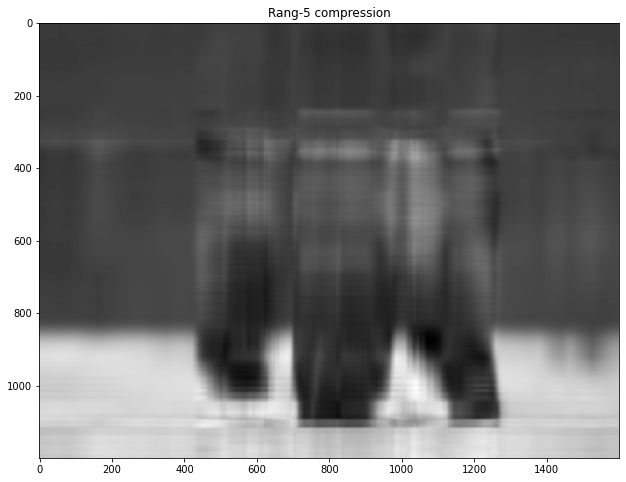

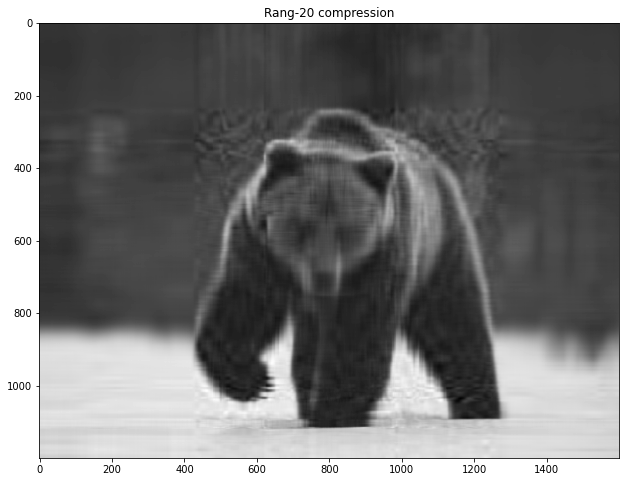

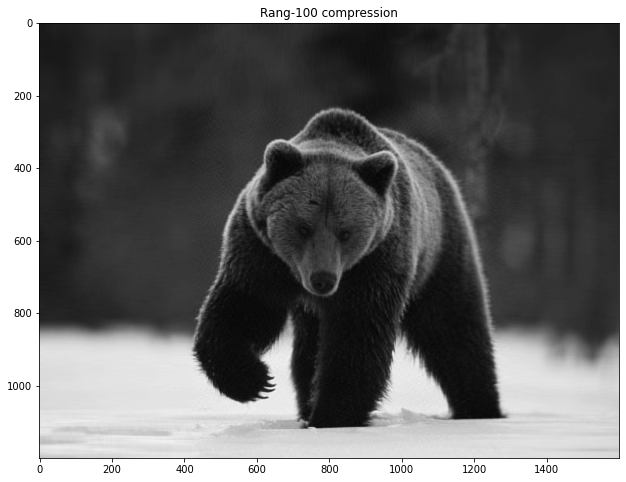

In [ ]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
Sdiag = np.diag(S)

for i, rang in enumerate([5, 20, 100]):
  X_approx = U[:, :rang] @ Sdiag[:rang, :rang] @ VT[:rang, :]
  plt.figure(i + 1)
  plt.imshow(X_approx, cmap='gray')
  plt.title(f'Rang-{rang} compression')

Text(0.5, 1.0, 'cumulative sum of singular values')

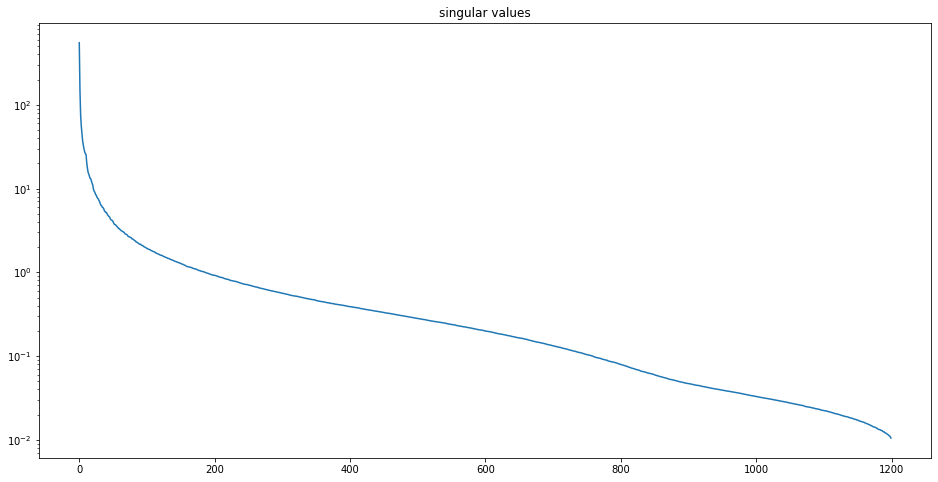

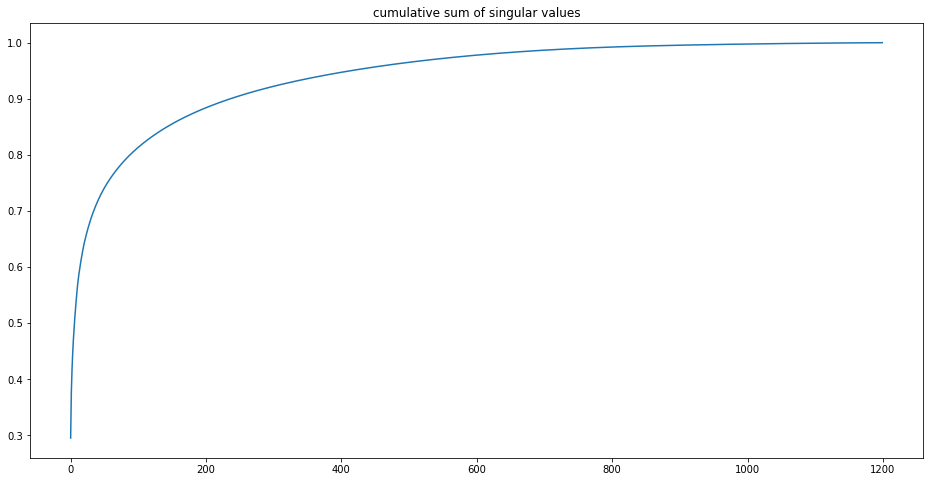

In [ ]:
plt.figure(1)
plt.semilogy(S)
plt.title('singular values')

plt.figure(2)
plt.plot(np.cumsum(S) / np.sum(S))
plt.title('cumulative sum of singular values')

## Image projection

Imagine having a large dataset of humans faces. 

$ X = U \Sigma V^T $, where $ X $ is a matrix of human faces, where each face is represented by one column-vector.

Once we have this SVD, we can project any new face onto the first $ r $ "eigen faces" of $ U $ orthogonal basis space:

$ projection = U_r^Tx $. Then to restore this face: $ restored = U_rprojection = U_rU_r^Tx$ $\not =$ (!) x. So instead of keeping entire $ x $ vector, we can store it's small projection $ U_r^Tx $